In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import math as math
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic,ExpSineSquared,PairwiseKernel
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import (StationaryKernelMixin,NormalizedKernelMixin,Kernel,Hyperparameter,squareform,pdist,cdist)
import scipy.spatial.distance as distance
import joblib
import matplotlib.pyplot as plt
import os
from joblib import load

In [3]:
#columns = ["x","y","z","w","data","error"]
datatab = pd.read_table(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Data\SEOB_7D_MM_data_chi_par.txt")
# Normalize the 'Mass' column by dividing by 150
datatab['Mass'] = datatab['Mass'] / 150.0  # This scales Mass to [0.25, 1]
datatab['Q'] = datatab['Q']/(1+datatab['Q'])**2

# Rename for consistency with the rest of your code
datatab.columns = ['w', 'q', 'chi1', 'chi2', 'theta1', 'theta2', 'phis', 'mismatch', 'error']


w = datatab['w']
q = datatab['q']
chi1 = datatab['chi1']
chi2 = datatab['chi2']
theta1 = datatab['theta1']
theta2 = datatab['theta2']
phis = datatab['phis']
mismatch = datatab['mismatch']
error = datatab['error']


# First Mass
datam1 = datatab[0:250]
wm1 = datam1['w']
qm1 = datam1['q']
chi1m1 = datam1['chi1']
chi2m1 = datam1['chi2']
theta1m1 = datam1['theta1']
theta2m1 = datam1['theta2']
phism1 = datam1['phis']
mismatchm1 = datam1['mismatch']
em1 = datam1['error']
X1 = np.column_stack((wm1,qm1,chi1m1,chi2m1,theta1m1,theta2m1,phism1,mismatchm1))

# Second Mass
datam2 = datatab[250:500]
wm2 = datam2['w']
qm2 = datam2['q']
chi1m2 = datam2['chi1']
chi2m2 = datam2['chi2']
theta1m2 = datam2['theta1']
theta2m2 = datam2['theta2']
phism2 = datam2['phis']
mismatchm2 = datam2['mismatch']
em2 = datam2['error']
X2 = np.column_stack((wm2, qm2, chi1m2, chi2m2, theta1m2, theta2m2, phism2, mismatchm2))

# Third Mass
datam3 = datatab[500:750]
wm3 = datam3['w']
qm3 = datam3['q']
chi1m3 = datam3['chi1']
chi2m3 = datam3['chi2']
theta1m3 = datam3['theta1']
theta2m3 = datam3['theta2']
phism3 = datam3['phis']
mismatchm3 = datam3['mismatch']
em3 = datam3['error']
X3 = np.column_stack((wm3, qm3, chi1m3, chi2m3, theta1m3, theta2m3, phism3, mismatchm3))

# Fourth Mass
datam4 = datatab[750:]
wm4 = datam4['w']
qm4 = datam4['q']
chi1m4 = datam4['chi1']
chi2m4 = datam4['chi2']
theta1m4 = datam4['theta1']
theta2m4 = datam4['theta2']
phism4 = datam4['phis']
mismatchm4 = datam4['mismatch']
em4 = datam4['error']
X4 = np.column_stack((wm4, qm4, chi1m4, chi2m4, theta1m4, theta2m4, phism4, mismatchm4))


X = np.column_stack((w,q,chi1,chi2,theta1,theta2,phis))
D = np.concatenate((mismatchm1,mismatchm2,mismatchm3,mismatchm4))
E = np.concatenate((em1,em2,em3,em4))

In [4]:
indices = np.arange(X.shape[0])
X_trainval, X_test, D_trainval, D_test, E_trainval, E_test, indices_trainval, indices_test = train_test_split(X, D,E,indices, test_size=0.1, random_state=42)

In [5]:
base_dir = r'C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Final_gps'
kernel_names = [
    "RBFMat",
    "RBFLap",
    "Mat_noerr",
    "Laplace_noerr",
    "RBF_noerr",
    "Mat_minmaxerr",
    "Laplace_minmaxerr",
    "RBF_minmaxerr"
]

for kernel_name in kernel_names:
  model_path = os.path.join(base_dir, f'7DGPR_{kernel_name}.joblib')
  gpr_loaded = load(model_path)
  print(gpr_loaded.kernel_)

1.04**2 * RBF(length_scale=[1.29, 1, 1, 1.1, 1.55, 100, 100]) + 0.919**2 * Matern(length_scale=[5.64, 0.0653, 0.561, 2.77, 3.05, 3.41, 9.46], nu=0.75)
1.06**2 * RBF(length_scale=[1.72, 0.1, 0.1, 0.529, 0.776, 0.63, 3.34]) + 0.1**2 * PairwiseKernel(gamma=10.000000000000002, metric=laplacian)
0.961**2 * Matern(length_scale=[2.65, 0.0503, 0.234, 1.16, 1.44, 1.89, 5.55], nu=1.75) + WhiteKernel(noise_level=0.00606)
1.94**2 * PairwiseKernel(gamma=0.1369848824111053, metric=laplacian) + WhiteKernel(noise_level=0.00953)
0.819**2 * RBF(length_scale=[1.39, 0.0287, 0.087, 0.658, 0.903, 0.725, 3.68]) + WhiteKernel(noise_level=0.00685)
1.41**2 * Matern(length_scale=[5.45, 0.0636, 0.827, 1.98, 2.19, 2.56, 9.02], nu=1.75) + WhiteKernel(noise_level=0.0439)
2.17**2 * PairwiseKernel(gamma=0.10000000000000002, metric=laplacian) + WhiteKernel(noise_level=0.0439)
0.954**2 * RBF(length_scale=[2.37, 0.0287, 0.384, 0.887, 1.13, 1.03, 4.37]) + WhiteKernel(noise_level=0.0439)


Processing kernels: 100%|██████████| 8/8 [00:00<00:00, 19.69it/s]


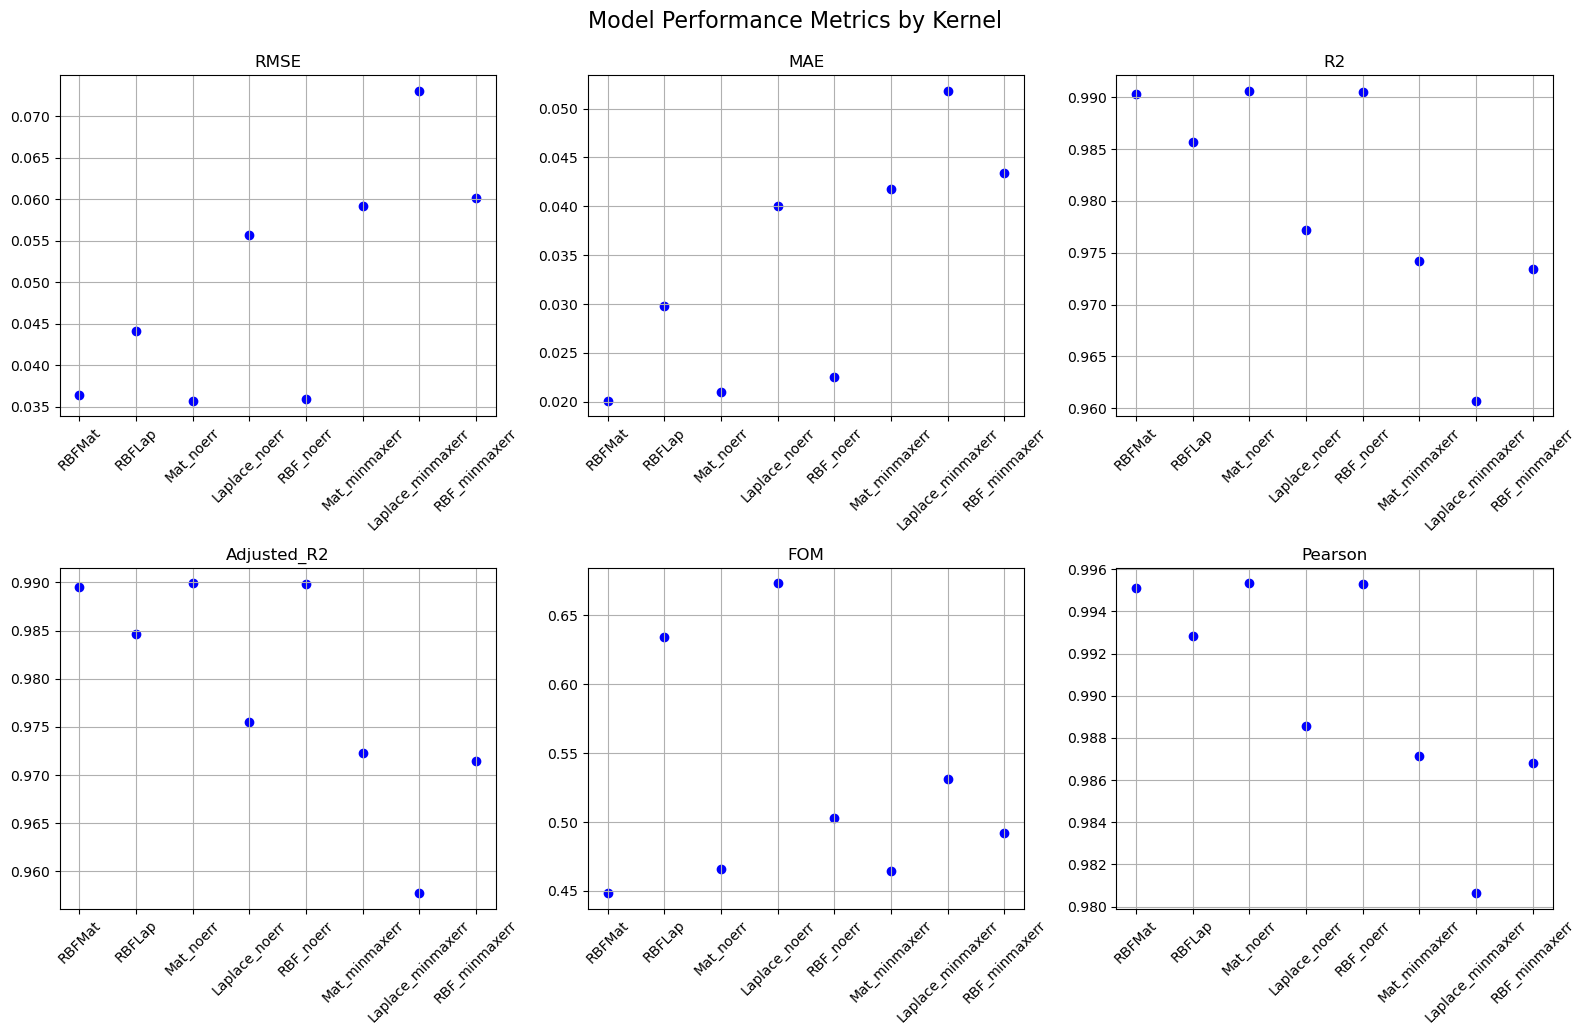

In [7]:
base_dir = r'C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Final_gps'

# Define only kernel names (used to load from disk)
kernel_names = [
    "RBFMat",
    "RBFLap",
    "Mat_noerr",
    "Laplace_noerr",
    "RBF_noerr",
    "Mat_minmaxerr",
    "Laplace_minmaxerr",
    "RBF_minmaxerr"
]


metrics = {"RMSE": {}, "MAE": {}, "R2": {}, "Adjusted_R2": {}, "FOM": {}, "Pearson":{} }

# Compute metrics
for kernel_name in tqdm(kernel_names, desc="Processing kernels"):
    model_path = os.path.join(base_dir, f'7DGPR_{kernel_name}.joblib')
    gpr_loaded = load(model_path)

    mean_pred, std_pred = gpr_loaded.predict(X_test, return_std=True)

    rmse = np.sqrt(mean_squared_error(D_test, mean_pred))
    mae = mean_absolute_error(D_test, mean_pred)
    r2 = r2_score(D_test, mean_pred)
    adj_r2 = 1 - (1 - r2) * (len(D_test) - 1) / (len(D_test) - X_test.shape[1] - 1)
    fom = np.mean(np.abs(D_test - mean_pred) / std_pred)
    pearson, _ = pearsonr(D_test.ravel(), mean_pred.ravel())

    # Store metrics
    metrics["RMSE"][kernel_name] = rmse
    metrics["MAE"][kernel_name] = mae
    metrics["R2"][kernel_name] = r2
    metrics["Adjusted_R2"][kernel_name] = adj_r2
    metrics["FOM"][kernel_name] = fom
    metrics["Pearson"][kernel_name] = pearson

# Plot
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
axs = axs.ravel()

for i, (metric_name, metric_values) in enumerate(metrics.items()):
    axs[i].scatter(list(metric_values.keys()), list(metric_values.values()), color='blue')
    axs[i].set_title(metric_name)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)

plt.tight_layout()
plt.suptitle("Model Performance Metrics by Kernel", fontsize=16, y=1.03)
#plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\latex\LatexPlots\final_gps_plots\metrics_of_finalists", dpi=72, bbox_inches='tight')
plt.show()

